### Importando modulos e base de dados

In [128]:
import pandas as pd
import openpyxl as op

clientes_df = pd.read_csv('CadastroClientes.csv', sep = ';')
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep = ';')
servicos_df = pd.read_excel('BaseServicosPrestados.xlsx', sheet_name=0) # O pandas pediu a importação do openpyxl para ler o arquivo


### Tratando dados

In [129]:
import re
clientes_df = clientes_df[['Valor Contrato Mensal', 'ID Cliente']] # Deixando somente as colunas que vamos usar no df clientes
# No nosso DF funcionario, os valores estão em formato de ST.
#Fiz um for na coluna 'Beneficios' , 'VR' e 'Impostos' e retirei todos os caracteres ',' e no lugar coloquei '.'
for i, beneficio in enumerate(funcionarios_df['Beneficios']):
    funcionarios_df.loc[i, 'Beneficios'] = re.sub(',', '.', funcionarios_df.loc[i,'Beneficios'])

for i, VR in enumerate(funcionarios_df['VR']):
    funcionarios_df.loc[i, 'VR'] = re.sub(',', '.', funcionarios_df.loc[i,'VR'])

for i, imposto in enumerate(funcionarios_df['Impostos']):
    funcionarios_df.loc[i, 'Impostos'] = re.sub(',', '.', funcionarios_df.loc[i,'Impostos'])
#Depois de substituir as ',' pelo '.', pude transformar os valores que eram do tipo STR -> INT. Agora posso realizar as operações normal
impostos = pd.to_numeric(funcionarios_df['Impostos'], downcast = 'integer')
salario_base = pd.to_numeric(funcionarios_df['Salario Base'], downcast = 'integer')
beneficios = pd.to_numeric(funcionarios_df['Beneficios'], downcast= 'integer')
vt = pd.to_numeric(funcionarios_df['VT'], downcast='integer')
vr = pd.to_numeric(funcionarios_df['VR'], downcast='integer')
salario_funcionarios = pd.concat([salario_base, beneficios, vt,vr], axis=1)
salario_funcionarios['Salario Liquido'] = salario_funcionarios.sum(axis=1)
salario_funcionarios['Imposto'] = pd.concat([impostos], axis = 1)
salario_funcionarios['Salario Liquido'] = salario_funcionarios['Salario Liquido'] - salario_funcionarios['Imposto']
display(salario_funcionarios)

,Salario Base,Beneficios,VT,VR,Salario Liquido,Imposto
0,21910,4382.0,242,719.04,16298.04,10955.0
1,5404,1080.8,154,574.56,4511.36,2702.0
2,16066,3213.2,154,729.12,12129.32,8033.0
3,21305,4261.0,220,524.16,15657.66,10652.5
4,5098,1019.6,176,725.76,4470.36,2549.0
...,...,...,...,...,...,...
109,10793,2158.6,242,514.08,8311.18,5396.5
110,4048,809.6,198,796.32,3827.92,2024.0
111,24596,4919.2,242,561.12,18020.32,12298.0
112,5078,1015.6,308,665.28,4527.88,2539.0


### 1 - Folha salarial

O valor total gasto com salarios na empresa é de: R$1179644.22 reais
Os 5 maiores salarios da companhia são:


<Axes: >

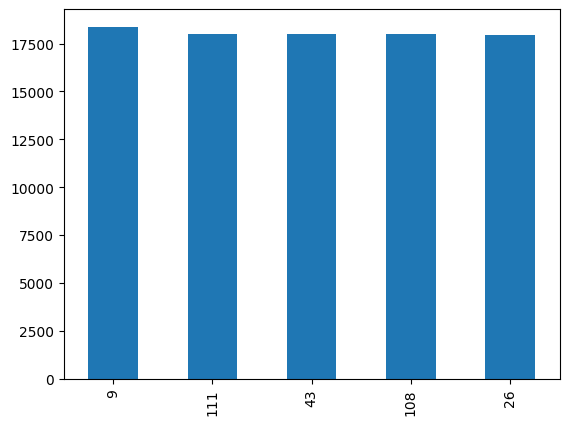

In [130]:
maiores_salarios = salario_funcionarios['Salario Liquido']
maiores_salarios = maiores_salarios.sort_values(ascending=False)
salario_total = salario_funcionarios['Salario Liquido'].sum()
print(f'O valor total gasto com salarios na empresa é de: R${salario_total:.2f} reais')
print('Os 5 maiores salarios da companhia são:')
maiores_salarios[:5].plot(kind = 'bar')


### 2 - Faturamento da Empresa

In [131]:
servicos_df = servicos_df.merge(clientes_df, on = 'ID Cliente') # Mesclando as tabelas serviços com clientes
display(servicos_df)

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal
0,OS0001,67,1,14,540
1,OS0002,17,2,12,1260
2,OS0003,116,4,14,2520
3,OS0004,37,5,8,3510
4,OS0005,130,6,8,2340
...,...,...,...,...,...
232,OS0233,111,315,4,1575
233,OS0234,124,316,8,3690
234,OS0235,72,317,6,2385
235,OS0236,90,319,14,4185


In [132]:
faturamento_total = servicos_df['Valor Contrato Mensal'].sum()
print(f'Em 2019, o faturamento total da empresa foi de R${faturamento_total:.2f} reais')

Em 2019, o faturamento total da empresa foi de R$577890.00 reais


### 3 - % Funcionario que Fecharam Contrato

In [133]:
funcionarios_venderam = servicos_df['ID Funcionário'] # Coloco todos os funcionaro que fizeram pelo menos uma venda em um df de uma coluna
funcionarios_venderam = len(funcionarios_venderam.unique()) # A função unique() conta quantos elementos tenho na coluna, ignorando os duplicados
total_funcionarios = len(funcionarios_df['ID Funcionário'])
print(f'Na firma, temos um total de {total_funcionarios}')
print(f'A % de funcionarios que fecharam um contrato é de {(funcionarios_venderam/total_funcionarios) * 100:.2f} %')


Na firma, temos um total de 114
A % de funcionarios que fecharam um contrato é de 86.84 %


### 4 - Quantidade de Contratos por Área

<Axes: xlabel='Area'>

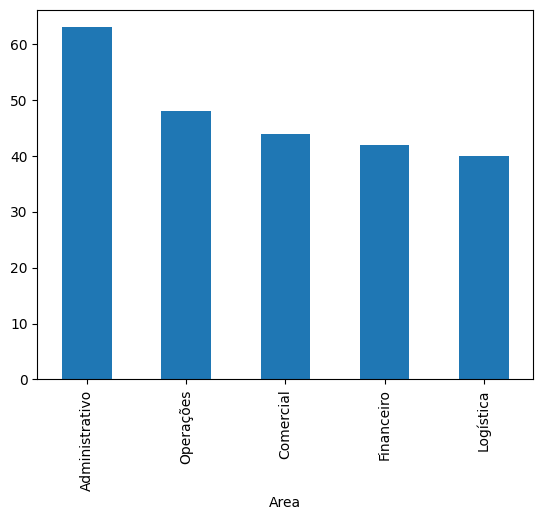

In [134]:
#Pegando a area dos vendedores da lista de vendas
total_contratos_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['Area', 'ID Funcionário']], on = 'ID Funcionário') # mesclando duas tabelas
total_contratos_df = total_contratos_df['Area'].value_counts()# Contando quantas vezes cada area apareceu
total_contratos_df.plot(kind='bar')

### 5 - Funcionarios por Área

Funcionarios por área na empresa:


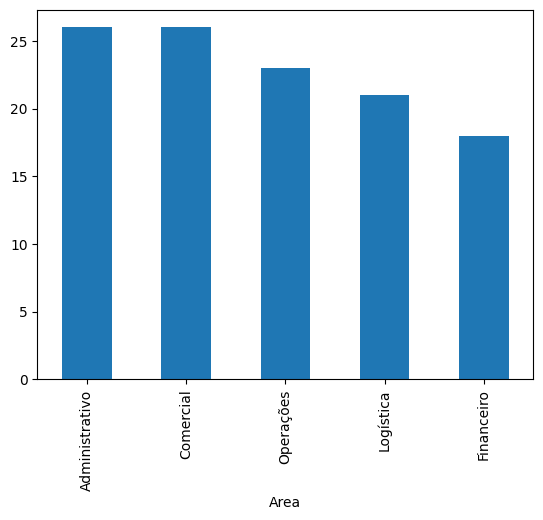

In [135]:
funcionario_area = funcionarios_df[['Area', 'ID Funcionário']]
funcionario_area = funcionario_area['Area'].value_counts()
funcionario_area.plot(kind='bar')
print('Funcionarios por área na empresa:')

### 6 - Ticket Médio Mensal

In [136]:
servicos_fechados = len(servicos_df['Codigo do Servico']) # Pegando a quantidade de servições feitos
total_vendas = servicos_df['Valor Contrato Mensal'].sum() # Pegando o total em vendas
ticket_medio_mensal = total_vendas / servicos_fechados
print(f'O ticket médio mensal da empresa é de R$ {ticket_medio_mensal:.2f} reais')

O ticket médio mensal da empresa é de R$ 2438.35 reais
